<a href="https://colab.research.google.com/github/angelmorales2621-gif/Investigaci-n-de-operaciones-/blob/main/Proyecto_ruta_cr%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensamblaje de una licuadora
Actividades por tarea (nodos):

A: Preparación del cuerpo principal de la licuadora (limpieza e inspección de la carcasa).

B: Colocación del motor eléctrico dentro del cuerpo (requiere haber preparado la carcasa).

C: Instalación del sistema de transmisión (engranes que conectan el motor con las cuchillas).

D: Montaje de cableado eléctrico y soldadura de conexiones internas.

E: Ensamblaje de las cuchillas en la base de acero inoxidable (se requiere la carcasa lista).

F: Fijación de la tapa de seguridad superior (necesita motor y transmisión montados).

G: Colocación del vaso de vidrio/plástico en la base (requiere transmisión y cableado listos).

H: Verificación del ensamblado de cuchillas y prueba de estanqueidad (sale de E).

I: Prueba final de funcionamiento y empaque (requiere que estén terminadas G y H).

# Problema dentro de la planta de ensamblaje
**Árbol de expansión mínima**

Para optimizar el tiempo de traslado de materia prima y de unidades dentro del proceso se requiere instalar bandas transportadoras entre estaciones. Para esto se tienen los siguientes datos respecto a las distancias entre nodos:

A — B : distancia = 6 m

A — E : distancia = 8 m

B — C : distancia = 4 m

B — D : distancia = 5 m

C — F : distancia = 6 m

D — F : distancia = 7 m

F — G : distancia = 3 m

E — H : distancia = 9 m

G — I : distancia = 5 m

H — I : distancia = 6 m

(Además, para permitir alternativas de transporte/inspección añadimos dos arcos no precedencia para el correcto flujo de materia prima y unidades)

C — D : distancia = 2 m

B — E : distancia = 7 m

F — H : distancia = 10 m

Para resolver este problema ocuparemos el árbol de expansión mínima

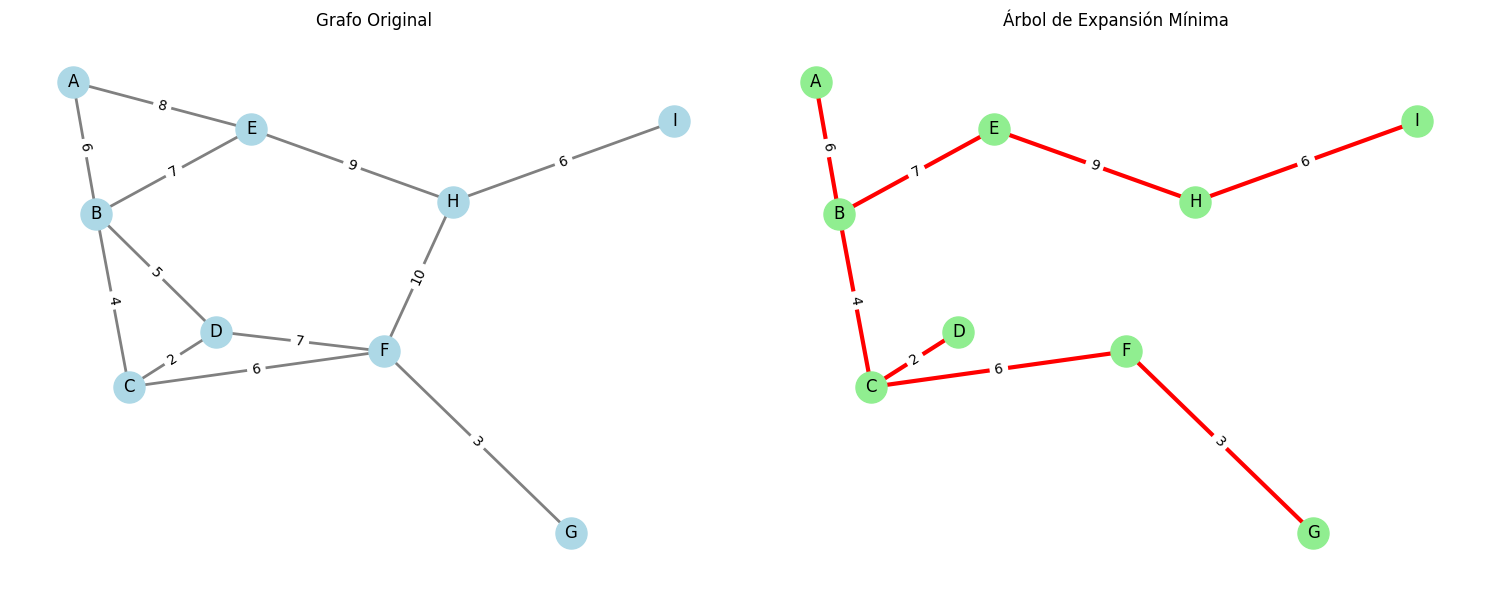

Distancia total del Árbol de expansión mínima: 43


In [1]:
# Árbol de expansión mínima
import networkx as nx
import matplotlib.pyplot as plt

def arbol_minimo(grafo, arbol_min):
    """Graficar el grafo original y su Árbol de expansión mínima"""

    # Posiciones para los nodos (iguales en ambos gráficos)
    pos = nx.spring_layout(grafo)

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Grafo PROBLEMA (dibujamos el grafo problema)
    nx.draw_networkx_nodes(grafo, pos, ax=ax1, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(grafo, pos, ax=ax1, edge_color='gray', width=2)
    nx.draw_networkx_labels(grafo, pos, ax=ax1, font_size=12)

    # Flujo de arcos
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, ax=ax1, edge_labels=edge_labels)

    ax1.set_title('Grafo Original')
    ax1.axis('off')

    # Árbol de expansión mínima
    nx.draw_networkx_nodes(arbol_min, pos, ax=ax2, node_size=500, node_color='lightgreen')
    nx.draw_networkx_edges(arbol_min, pos, ax=ax2, edge_color='red', width=3)
    nx.draw_networkx_labels(arbol_min, pos, ax=ax2, font_size=12)

    # Flujo de arcos en el Árbol de expansión mínima
    arco_min = nx.get_edge_attributes(arbol_min, 'weight')
    nx.draw_networkx_edge_labels(arbol_min, pos, ax=ax2, edge_labels=arco_min)

    ax2.set_title('Árbol de Expansión Mínima')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# GRafo
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 6), ('A', 'E', 8), ('B', 'C', 4), ('B', 'D', 5),
    ('C', 'F', 6), ('D', 'F', 7), ('F', 'G', 3), ('E', 'H', 9),
    ('H', 'I', 6), ('B', 'E', 7), ('C', 'D', 2), ('F', 'H', 10),

])

arbol_min = nx.minimum_spanning_tree(G)
arbol_minimo(G, arbol_min)

print(f"Distancia total del Árbol de expansión mínima: {sum(d['weight'] for u,v,d in arbol_min.edges(data=True))}")

**Ruta más corta**

También dentro de la planta se requiere que un inspector comienza en A y debe revisar obligatoriamente las estaciones F e I y terminar en H para supervisar.

Los tiempos de desplazamiento para ir de un nodo a otro son:

A — B : tiempo = 1 min

A — E : tiempo = 2 min

B — C : tiempo = 1 min

B — D : tiempo = 1 min

C — F : tiempo = 1 min

D — F : tiempo = 2 min

F — G : tiempo = 1 min

E — H : tiempo = 2 min

G — I : tiempo = 1 min

H — I : tiempo = 1 min

C — D : tiempo = 1 min

B — E : tiempo = 2 min

F — H : tiempo = 3 min

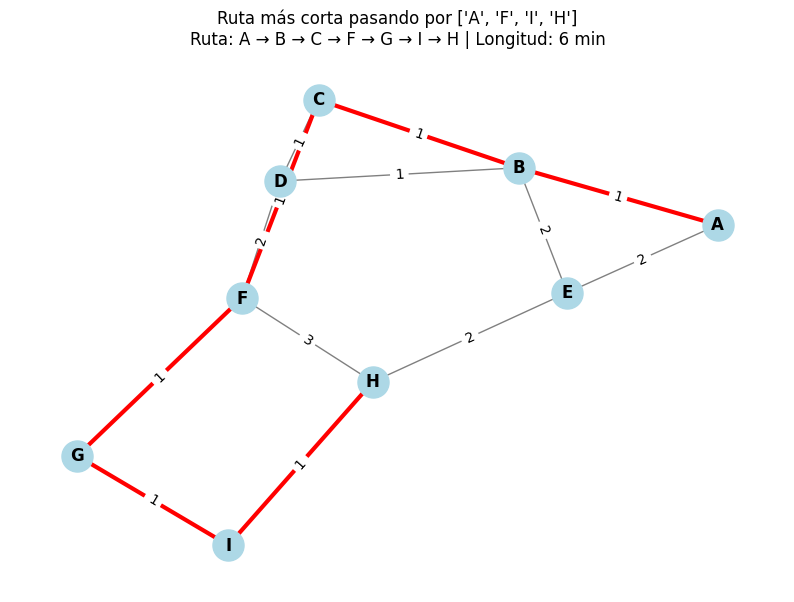

Ruta: ['A', 'B', 'C', 'F', 'G', 'I', 'H']
Longitud total: 6 min


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Ruta más corta múltiple (pasando por paradas intermedias)
def ruta_mas_corta_multidestino(grafo, paradas):
    """
    Calcula y visualiza la ruta más corta que pasa por una secuencia de paradas dadas.
    Ejemplo: paradas = ['A','F','I','H']
    """

    ruta_total = []
    longitud_total = 0
    aristas_ruta_total = []

    # Calcular rutas parciales entre pares consecutivos
    for i in range(len(paradas)-1):
        origen, destino = paradas[i], paradas[i+1]
        subruta = nx.shortest_path(grafo, source=origen, target=destino, weight='weight')
        sublongitud = nx.shortest_path_length(grafo, source=origen, target=destino, weight='weight')

        # Concatenar rutas (evitar repetir nodo intermedio)
        if i == 0:
            ruta_total.extend(subruta)
        else:
            ruta_total.extend(subruta[1:])

        longitud_total += sublongitud

        # Guardar aristas de esta subruta
        aristas_ruta_total.extend([(subruta[j], subruta[j+1]) for j in range(len(subruta)-1)])

    # Visualización
    pos = nx.spring_layout(grafo, seed=42)
    plt.figure(figsize=(10, 7))

    # Nodos
    nx.draw_networkx_nodes(grafo, pos, node_size=500, node_color='lightblue')

    # Aristas normales
    aristas_normales = [a for a in grafo.edges() if a not in aristas_ruta_total and (a[1],a[0]) not in aristas_ruta_total]
    nx.draw_networkx_edges(grafo, pos, edgelist=aristas_normales, edge_color='gray', width=1)

    # Aristas de la ruta resaltada
    nx.draw_networkx_edges(grafo, pos, edgelist=aristas_ruta_total, edge_color='red', width=3)

    # Etiquetas
    nx.draw_networkx_labels(grafo, pos, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels)

    plt.title(f"Ruta más corta pasando por {paradas}\nRuta: {' → '.join(ruta_total)} | Longitud: {longitud_total} min")
    plt.axis("off")
    plt.show()

    return ruta_total, longitud_total

# Construcción del grafo con tiempos (minutos)
G = nx.Graph()
G.add_weighted_edges_from([
    ('A','B',1), ('A','E',2), ('B','C',1), ('B','D',1),
    ('C','F',1), ('D','F',2), ('F','G',1), ('E','H',2),
    ('H','I',1), ('B','E',2), ('C','D',1), ('F','H',3), ('G','I',1)
])

# Inspector: A → F → I → H
ruta, longitud = ruta_mas_corta_multidestino(G, ['A','F','I','H'])
print("Ruta:", ruta)
print("Longitud total:", longitud, "min")


**Flujo máximo**

Si un arco tarda t minutos en transportar un lote de productos, entonces: Capacidad = tamaño del lote/ tiempo.

Entonces para un tamaño de lote = 8 se tiene:

A — B : tiempo = 1 min; capacidad = 8

A — E : tiempo = 2 min; capacidad = 4

B — C : tiempo = 1 min; capacidad = 8

B — D : tiempo = 1 min; capacidad = 8

C — F : tiempo = 1 min; capacidad = 8

D — F : tiempo = 2 min; capacidad = 4

F — G : tiempo = 1 min; capacidad = 8

E — H : tiempo = 2 min; capacidad = 4

G — I : tiempo = 1 min; capacidad = 8

H — I : tiempo = 1 min; capacidad = 8



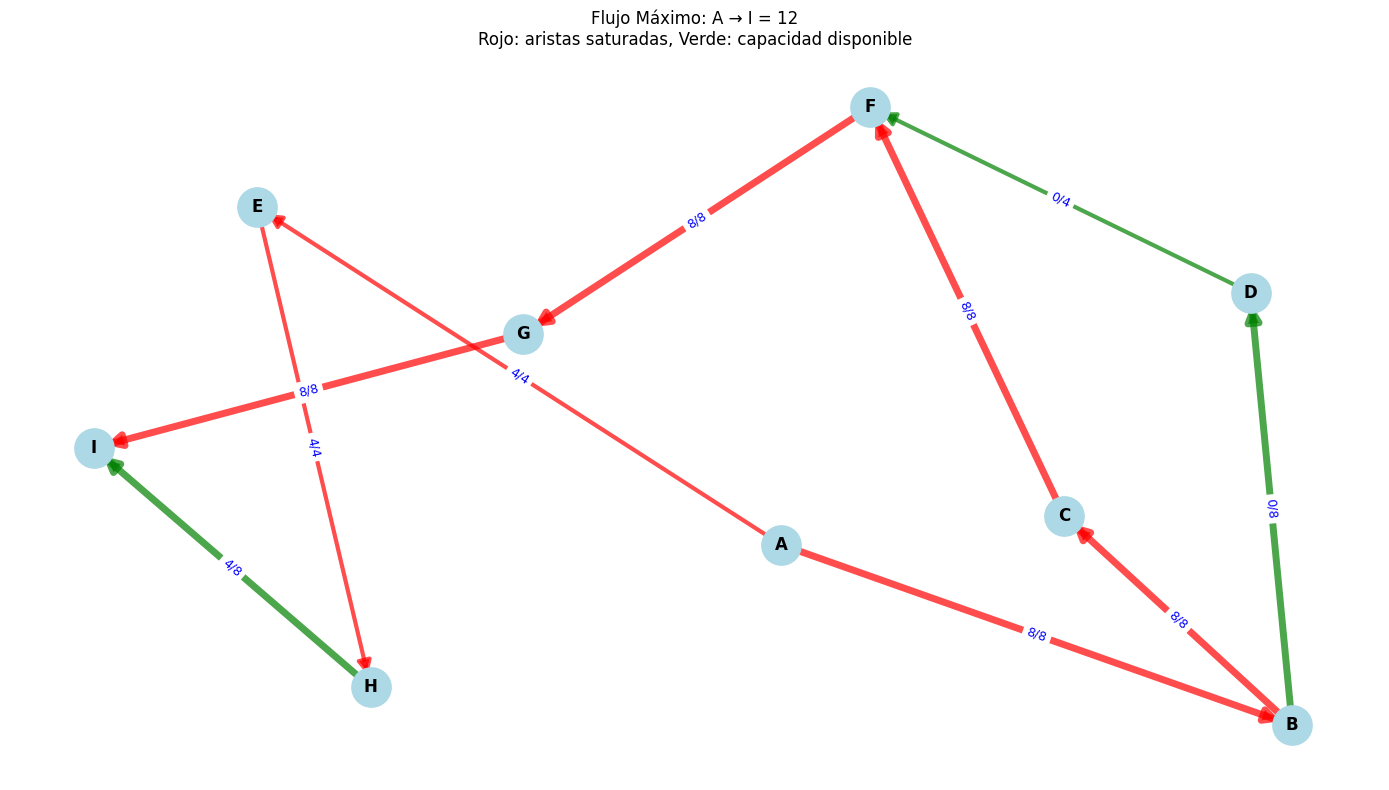

In [7]:
# Flujo máximo
def visualizar_flujo_maximo(grafo, origen, destino):
    """Visualiza el grafo de flujo con capacidades y flujos"""

    # Calcular flujo máximo
    valor_flujo, flujo_dict = nx.maximum_flow(grafo, origen, destino)

    # Posiciones para visualización
    pos = nx.spring_layout(grafo)

    # Crear figura
    plt.figure(figsize=(14, 8))

    # Dibujar nodos
    nx.draw_networkx_nodes(grafo, pos, node_size=800, node_color='lightblue')

    # Dibujar aristas con grosor proporcional a la capacidad
    for u, v, data in grafo.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u][v]

        # Grosor proporcional a la capacidad
        width = capacidad / 2 + 1

        # Definimos los colores rojo si está saturada, verde si aún tiene capacidad
        color = 'red' if flujo_actual == capacidad else 'green'

        nx.draw_networkx_edges(grafo, pos, edgelist=[(u, v)],
                              width=width, edge_color=color, alpha=0.7,
                              arrows=True, arrowsize=20)

    # Etiquetas de nodos
    nx.draw_networkx_labels(grafo, pos, font_size=12, font_weight='bold')

    # Etiquetas de aristas (capacidad/flujo)
    edge_labels = {}
    for u, v, data in grafo.edges(data=True):
        capacidad = data['capacity']
        flujo_actual = flujo_dict[u][v]
        edge_labels[(u, v)] = f"{flujo_actual}/{capacidad}"

    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels,
                                font_size=9, font_color='blue')

    plt.title(f'Flujo Máximo: {origen} → {destino} = {valor_flujo}\n'
              f'Rojo: aristas saturadas, Verde: capacidad disponible')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return valor_flujo, flujo_dict


G_visual = nx.DiGraph()
G_visual.add_edge('A', 'B', capacity=8)
G_visual.add_edge('A', 'E', capacity=4)
G_visual.add_edge('B', 'C', capacity=8)
G_visual.add_edge('B', 'D', capacity=8)
G_visual.add_edge('C', 'F', capacity=8)
G_visual.add_edge('D', 'F', capacity=4)
G_visual.add_edge('F', 'G', capacity=8)
G_visual.add_edge('G', 'I', capacity=8)
G_visual.add_edge('E', 'H', capacity=4)
G_visual.add_edge('H', 'I', capacity=8)


valor_flujo, flujo_dict = visualizar_flujo_maximo(G_visual, 'A', 'I')